In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset bank.csv
df=pd.read_csv("bank.csv")
#to display first 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
# target : deposit 
df["deposit"].unique()

array([1, 0], dtype=int64)

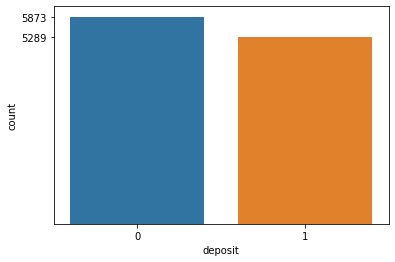

In [4]:
#visualize
sns.countplot(data=df,x="deposit")
c=df["deposit"].value_counts()
plt.yticks(c)
plt.show()

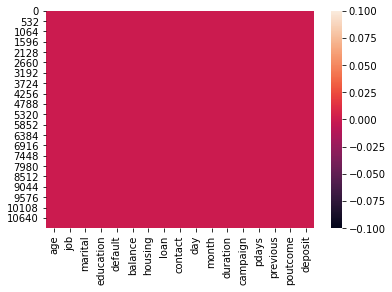

In [5]:
# check mull values
sns.heatmap(df.isnull())
plt.show() # there are no null values

In [6]:
# checking data type of all
df.info() # all numeric and all non-null values
# it can be seen the dataframe has been labelencoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [7]:
#Select input and output variable from dataset
X=df.drop("deposit",axis=1) #select all input features except deposit
#or X=df.iloc[:,:-1]
Y=df["deposit"] #select target means output variable or Y=df.iloc[:,-1]

In [8]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
# create a function for models/algos to avoid repetitive writing 
def create_model(model):
    model.fit(X_train,Y_train) # train the model
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
# baseline model : using logistic regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [12]:
# calling function 
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.76      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.77      3349
weighted avg       0.77      0.77      0.77      3349

Confusion Matrix
[[1402  358]
 [ 425 1164]]


In [13]:
# calling DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt=DecisionTreeClassifier()

# calling function

dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.78      0.78      3349
weighted avg       0.79      0.79      0.79      3349

Confusion Matrix
[[1408  352]
 [ 366 1223]]


In [15]:
dt.feature_importances_

array([0.07670524, 0.03730608, 0.01757275, 0.01291069, 0.00084141,
       0.08525639, 0.04297254, 0.00644902, 0.06138185, 0.07980108,
       0.09867909, 0.35107877, 0.02016511, 0.06667004, 0.00527038,
       0.03693957])

In [16]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [17]:
# plotting the tree diagram , items with 0 value will not be featured in tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt,feature_names=features,filled=True) # filled for colour

<Figure size 1440x1440 with 0 Axes>

# Pruning: When we remove sub-nodes of a decision node, this process is called pruning.

In [18]:
# We've got less score i.e 0.76 % , good but not excellent 
# reason behind less score -> overfit 
# Therefore to reduce the overfitting situation
# We use pruning technique 

#How to reduce a overfitting situation by using the Pruning technique
#There are 2 types of pruning technique
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

In [19]:
# max depth : *It cannot be more than 8*
# max_depth parameter
dt1 = DecisionTreeClassifier(max_depth=5)

In [20]:
# training the model again
dt1 = create_model(dt1) # calling the function
# we watch 1 of recall which describes chances

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

Confusion Matrix
[[1316  444]
 [ 229 1360]]


In [21]:
dt1.feature_importances_

array([0.02684597, 0.        , 0.        , 0.00285266, 0.        ,
       0.00202181, 0.06633719, 0.00376208, 0.11972821, 0.00351189,
       0.05243751, 0.57641262, 0.        , 0.09496331, 0.        ,
       0.05112675])

In [22]:
# plotting the tree diagram , items cut post max_depth application
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=features,filled=True) # filled for colour

<Figure size 1440x1440 with 0 Axes>

# node which does not have any further branches is called leaf node
# The minimum leaf node is supposed to be 45-50 , greater than that is alright but not less than

In [23]:
# 2nd Pruning technique : min_samples_leaf
# min_samples_leaf parameter
# create object of decision tree classifier
dt2 = DecisionTreeClassifier(min_samples_leaf=45) # by default Gini index unless specified(entropy)

In [24]:
# train and test the model by calling function
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

Confusion Matrix
[[1379  381]
 [ 204 1385]]


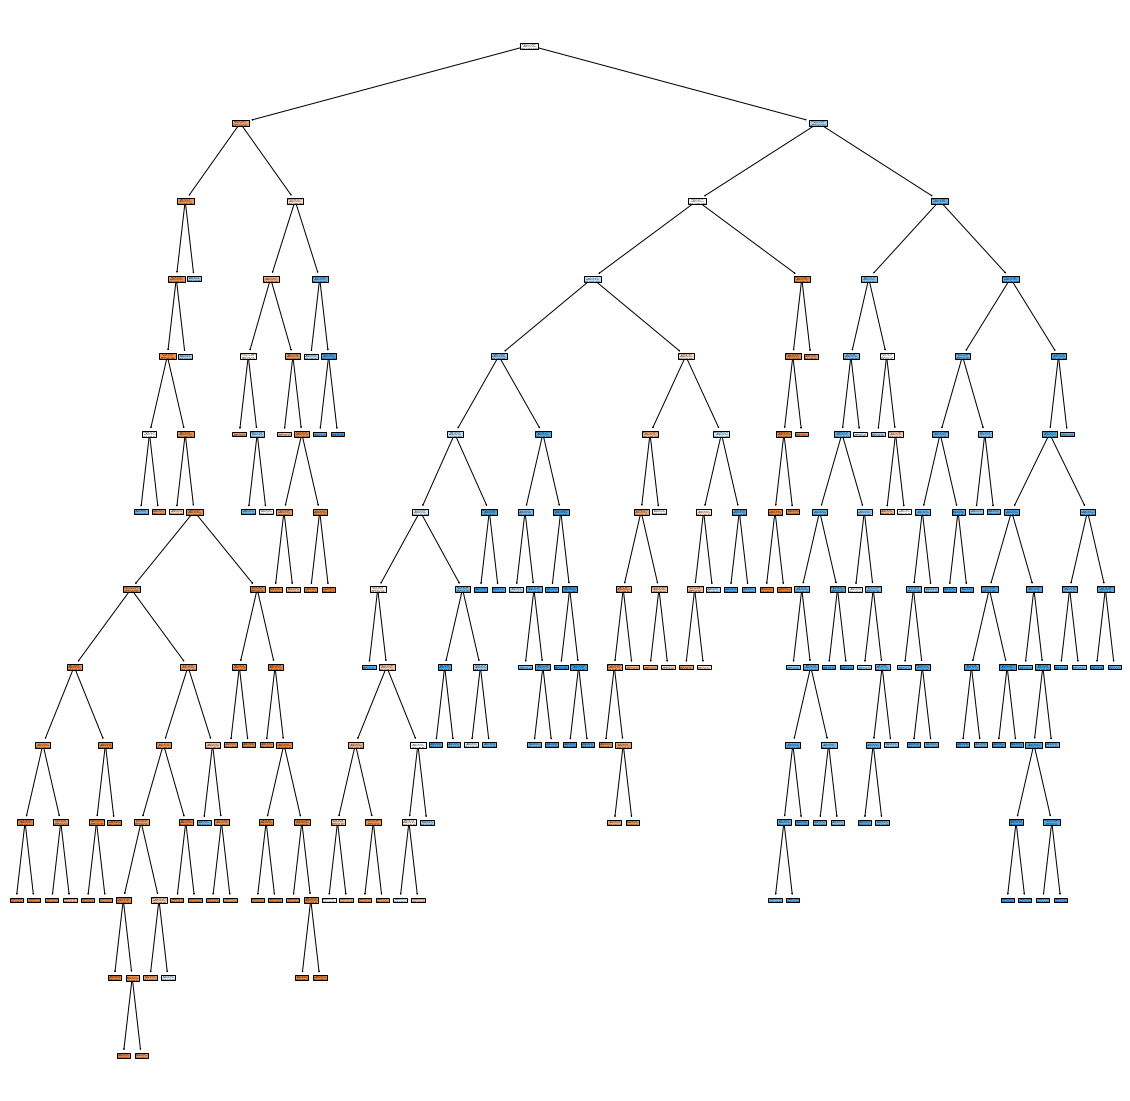

In [25]:
# plotting the tree diagram , items cut post min_samples_leaf application
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True) # filled for colour

In [26]:
# create object of decision tree classifier
dt3 = DecisionTreeClassifier(min_samples_leaf=45,criterion = 'entropy') # by default Gini index unless specified(entropy)

# calling function
dt3 =create_model(dt3)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusion Matrix
[[1438  322]
 [ 283 1306]]


In [27]:
#Note : here best method DecisionTree pruning tech : min_samples_leaf=45
#and method=gini index
#recall .87 means 87% predict